In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('./work/viikko7/datasets/diabetes.csv')

X = df.drop('Outcome', axis=1) # selittävät muuttujat
y = df['Outcome'] # selitettävä muuttuja

In [17]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

In [18]:
# Scaling
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [19]:
# Fitting Logistic Regression to the Training set
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# logistic regression coefficients
print('Coefficients: \n', model.coef_)
# logistic regression intercept
print('Intercept: \n', model.intercept_)

Coefficients: 
 [[ 0.3097449   1.06006236 -0.26057825  0.06865213 -0.15816976  0.68419394
   0.29353764  0.2396453 ]]
Intercept: 
 [-0.78763914]


In [20]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred_pros = model.predict_proba(X_test) # probability estimates

[[98  9]
 [18 29]]


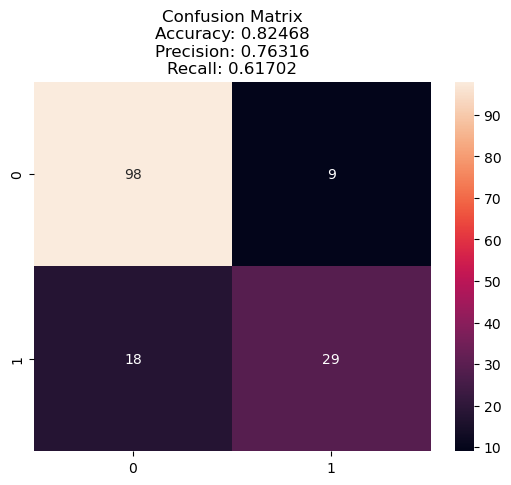

True Negative: 98
False Positive: 9
False Negative: 18
True Positive: 29


In [21]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy
acc = accuracy_score(y_test, y_pred)
# Precision
pc = precision_score(y_test, y_pred)
# Recall
rc = recall_score(y_test, y_pred)

# Visualizing the Confusion Matrix
tn, fp, fn, tp = cm.ravel()
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="g", ax=ax)
ax.set_title(f'Confusion Matrix\nAccuracy: {acc:.5f}\nPrecision: {pc:.5f}\nRecall: {rc:.5f}')
plt.show()

# print tn, fp, fn, tp
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')


In [22]:
# Predicting new data
Xnew = pd.read_csv('./work/viikko7/datasets/diabetes-new.csv')
Xnew_org = Xnew
Xnew = scaler_x.transform(Xnew)
ynew = model.predict(Xnew)
ynew_pros = model.predict_proba(Xnew)

for i in range(len(Xnew)):
    print(f'{ynew[i]} {ynew_pros[i]}')

1 [0.07208898 0.92791102]
0 [0.91751376 0.08248624]
0 [0.64985917 0.35014083]
0 [0.65421895 0.34578105]
